In [1]:
# Import necessary libraries
import pandas as pd #type: ignore
import numpy as np #type: ignore
import matplotlib.pyplot as plt #type: ignore
import seaborn as sns #type: ignore
from sklearn.model_selection import train_test_split, GridSearchCV #type: ignore
from sklearn.preprocessing import StandardScaler #type: ignore
from sklearn.linear_model import LogisticRegression #type: ignore
from sklearn.tree import DecisionTreeClassifier, plot_tree #type: ignore
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve #type: ignore

In [2]:
# Load the dataset
data = pd.read_csv('diabetes.csv')

In [3]:
# Display basic information about the dataset
data.info()
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.

In [4]:
# Check for missing values
print('Missing values:', data.isnull().sum())

Missing values: Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
# Data Preprocessing: Scaling numerical features
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data.iloc[:, :-1]), columns=data.columns[:-1])
data_scaled['Outcome'] = data['Outcome']

In [6]:
# Split the data into training and testing sets
X = data_scaled.drop('Outcome', axis=1)
y = data_scaled['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
log_accuracy = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", log_accuracy)

Logistic Regression Accuracy: 0.7532467532467533


In [8]:
# Decision Tree Model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.7467532467532467


In [9]:
# Evaluation Metrics
def evaluate_model(y_test, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [10]:
# Logistic Regression Evaluation
evaluate_model(y_test, y_pred_log, 'Logistic Regression')


Model: Logistic Regression
Accuracy: 0.7532467532467533
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Confusion Matrix:
 [[79 20]
 [18 37]]


In [11]:
# Decision Tree Evaluation
evaluate_model(y_test, y_pred_dt, 'Decision Tree')


Model: Decision Tree
Accuracy: 0.7467532467532467
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Confusion Matrix:
 [[75 24]
 [15 40]]


In [12]:
# Select the best model based on accuracy
best_model = log_reg if log_accuracy > dt_accuracy else dt
print("\nBest model selected:", "Logistic Regression" if best_model == log_reg else "Decision Tree")


Best model selected: Logistic Regression


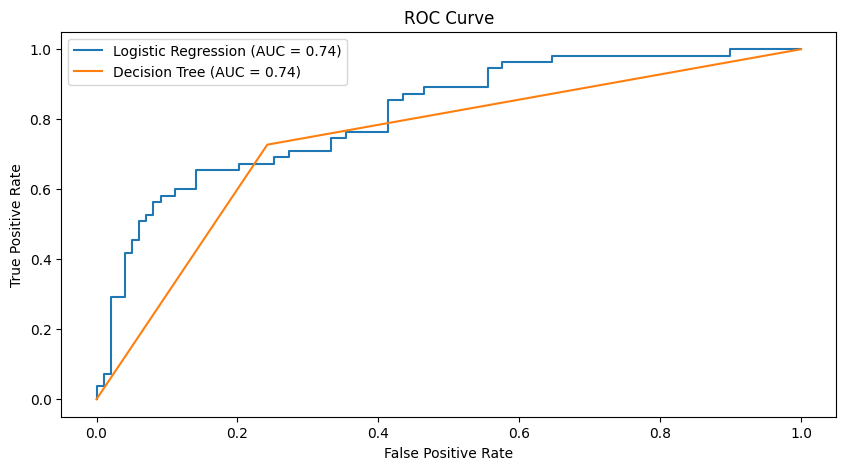

In [13]:
# ROC Curve for both models
plt.figure(figsize=(10, 5))
for model, y_pred, name in zip([log_reg, dt], [y_pred_log, y_pred_dt], ['Logistic Regression', 'Decision Tree']):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_pred):.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [14]:
# User Input Prediction
def predict_diabetes(model):
    print("\nEnter patient health metrics:")
    user_input = []
    for feature in X.columns:
        value = float(input(f"{feature}: "))
        user_input.append(value)
    # Convert input to DataFrame with the same column names
    user_input_df = pd.DataFrame([user_input], columns=X.columns)
    user_input_scaled = pd.DataFrame(scaler.transform(user_input_df), columns=X.columns)
    prediction = model.predict(user_input_scaled)
    print("Diabetes Prediction:", "Positive" if prediction[0] == 1 else "Negative")

In [16]:
# Predict using the best model
print("\nPredicting using the best model...")
predict_diabetes(best_model)


Predicting using the best model...

Enter patient health metrics:
Diabetes Prediction: Negative
